In [18]:
import os
import pathlib
import sys

CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
conda_prefix_path = pathlib.Path(CONDA_PREFIX)
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'

PATH = os.environ['PATH']
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')

print(f'CONDA={conda_prefix_path}')
print(f'LD_PATH={LD_LIBRARY_PATH}')
print(f'PATH={PATH}')

# %env CONDA_PREFIX={CONDA_PREFIX}
# %env PATH={CONDA_PREFIX}/bin:{PATH}


CONDA=/home/mariowei/anaconda3/envs/nolimits
LD_PATH=
PATH=/home/mariowei/anaconda3/envs/nolimits/bin:/home/mariowei/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/usr/lib/wsl/lib:/mnt/c/windows/system32:/mnt/c/windows:/mnt/c/windows/System32/Wbem:/mnt/c/windows/System32/WindowsPowerShell/v1.0:/mnt/c/windows/System32/OpenSSH:/mnt/c/Users/mariowei/AppData/Local/Microsoft/WindowsApps:/mnt/c/Users/mariowei/AppData/Local/Programs/Microsoft VS Code/bin:/mnt/c/Users/mariowei/Anaconda3:/mnt/c/Users/mariowei/Anaconda3/Scripts:/mnt/c/Users/mariowei/Anaconda3/Library/bin:/snap/bin:/home/mariowei/notebooks/OpenLane:/home/mariowei/notebooks/OpenLane/scripts


In [ ]:
%%writefile environment.yml
channels:
  - litex-hub
  - conda-forge
dependencies:
  - ngspice
  - click
  - pyyaml
  - tclib
  - yosys
  - netgen
  - openroad 
  - open_pdks.sky130a
  - magic
  - ngspice-lib
  - gdstk
  - python
  - pip
  - pip:
    - cairosvg
    - pyspice

In [ ]:
!conda env update --prefix {CONDA_PREFIX} --file environment.yml

In [ ]:
!bin/micromamba list

In [ ]:
# import os
# import pathlib
# import sys

# # !curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba

# conda_prefix_path = pathlib.Path('conda-env')
# site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
# sys.path.append(str(site_package_path.resolve()))
# CONDA_PREFIX = str(conda_prefix_path.resolve())
# PATH = os.environ['PATH']
# LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
# %env CONDA_PREFIX={CONDA_PREFIX}
# %env PATH={CONDA_PREFIX}/bin:{PATH}

# # leads to error
# # %env LD_LIBRARY_PATH={CONDA_PREFIX}/lib:{LD_LIBRARY_PATH}

# # !bin/micromamba create --yes --prefix $CONDA_PREFIX
# # !echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
# # !bin/micromamba install --yes --prefix $CONDA_PREFIX \
# #                         --channel litex-hub \
# #                         --channel main \
# #                         open_pdks.sky130a \
# #                         magic \
# #                         openroad \
# #                         netgen \
# #                         yosys 
# # !bin/micromamba install --yes --prefix $CONDA_PREFIX --channel conda-forge tcllib gdstk pyyaml click

In [ ]:
# setup proxy
%env http_proxy=http://proxy-chain.intel.com:911
%env https_proxy=http://proxy-chain.intel.com:911

In [21]:
# clone OpenRoad
!git clone --depth=1 https://github.com/The-OpenROAD-Project/OpenLane

Cloning into 'OpenLane'...
remote: Enumerating objects: 466, done.
remote: Counting objects: 100% (466/466), done.
remote: Compressing objects: 100% (387/387), done.
remote: Total 466 (delta 70), reused 282 (delta 38), pack-reused 0
Receiving objects: 100% (466/466), 2.77 MiB | 6.30 MiB/s, done.
Resolving deltas: 100% (70/70), done.


# Digital Inverter

In [19]:
%%writefile inverter.v
module inverter(input wire in, output wire out);
    assign out = !in;
endmodule

Writing inverter.v


In [20]:
%%writefile config.tcl
set ::env(DESIGN_NAME) inverter
set ::env(VERILOG_FILES) "inverter.v"
set ::env(CLOCK_TREE_SYNTH) 0
set ::env(CLOCK_PORT) ""
set ::env(PL_RANDOM_GLB_PLACEMENT) 1
set ::env(FP_SIZING) absolute
set ::env(DIE_AREA) "0 0 50 50"
set ::env(PL_TARGET_DENSITY) 0.80
set ::env(FP_PDN_HORIZONTAL_HALO) 6
set ::env(FP_PDN_VERTICAL_HALO) 6
set ::env(DIODE_INSERTION_STRATEGY) 3

# disable version checks because we use conda packaged versions
set ::env(TEST_MISMATCHES) none
# disable klayout because of https://github.com/hdl/conda-eda/issues/175
set ::env(RUN_KLAYOUT) 0
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
set ::env(RUN_CVC) 0

Writing config.tcl


In [9]:
import os
import pathlib
# OPENLANE_ROOT=str(pathlib.Path('OpenLane').resolve())
OPENLANE_ROOT='/home/mariowei/notebooks/OpenLane'
PATH=os.environ['PATH']

%env PDK_ROOT={CONDA_PREFIX}/share/pdk
%env PDK=sky130A
%env STD_CELL_LIBRARY=sky130_fd_sc_hd
%env STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
%env TCLLIBPATH={CONDA_PREFIX}/lib/tcllib1.20
%env OPENLANE_ROOT={OPENLANE_ROOT}
%env PATH={PATH}:{OPENLANE_ROOT}:{OPENLANE_ROOT}/scripts
%env OPENLANE_LOCAL_INSTALL=1
!flow.tcl -design .

env: PDK_ROOT=/home/mariowei/anaconda3/envs/nolimits/share/pdk
env: PDK=sky130A
env: STD_CELL_LIBRARY=sky130_fd_sc_hd
env: STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
env: TCLLIBPATH=/home/mariowei/anaconda3/envs/nolimits/lib/tcllib1.20
env: OPENLANE_ROOT=/home/mariowei/notebooks/OpenLane
env: PATH=/home/mariowei/anaconda3/envs/nolimits/bin:/home/mariowei/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/usr/lib/wsl/lib:/mnt/c/windows/system32:/mnt/c/windows:/mnt/c/windows/System32/Wbem:/mnt/c/windows/System32/WindowsPowerShell/v1.0:/mnt/c/windows/System32/OpenSSH:/mnt/c/Users/mariowei/AppData/Local/Microsoft/WindowsApps:/mnt/c/Users/mariowei/AppData/Local/Programs/Microsoft VS Code/bin:/mnt/c/Users/mariowei/Anaconda3:/mnt/c/Users/mariowei/Anaconda3/Scripts:/mnt/c/Users/mariowei/Anaconda3/Library/bin:/snap/bin:/home/mariowei/notebooks/OpenLane:/home/mariowei/notebooks/OpenLane/scripts
env: OPENLANE_LOCAL_INSTALL=1
OpenLane 94521291e39

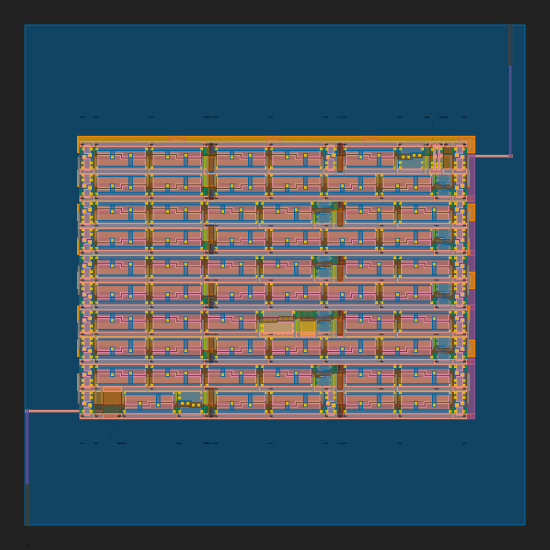

In [10]:
import pathlib
import gdstk
import IPython.display

gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('inverter.svg')
IPython.display.SVG('inverter.svg')

# Analog Inverter

In [11]:
%%script magic -dnull -noconsole -rcfile {CONDA_PREFIX}/share/pdk/sky130A/libs.tech/magic/sky130A.magicrc
cellname rename (UNNAMED) mosfet

box 0 0 950nm 650nm
paint ndiffusion

box 400nm -600nm 550nm 1200nm
paint polysilicon

box 0 0 400nm 650nm
label source
port make 3

box 550nm 0 950nm 650nm
label drain
port make 1

box 400nm -600nm 550nm 0
label gate
port make 2

extract
ext2spice lvs
ext2spice cthresh 0
ext2spice

gds labels no
gds write mosfet.gds


Magic 8.3 revision 315 - Compiled on Fri Aug 19 17:52:05 UTC 2022.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(vendor): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Using technology "sky130A", version 1.0.323-0-g6003ab3
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (units^2)

microns:   0.950 x 0.650   ( 0.000,  0.000), ( 0.950,  0.650)  0.618     
lambda:    95.00 x 65.00   (  0.00,  0.00 ), ( 95.00,  65.00)  6175.00   
internal:    190 x 130     (     0,  0    ), (   190,  130  )  24700     
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area

In [12]:
##############################################

In [13]:
%%script magic -dnull -noconsole -rcfile {CONDA_PREFIX}/share/pdk/sky130A/libs.tech/magic/sky130A.magicrc
cellname rename (UNNAMED) mosfet

box 0 0 950nm 650nm
paint ndiffusion

box 400nm -600nm 550nm 1200nm
paint polysilicon

box 0 0 400nm 650nm
label source
port make 3

box 550nm 0 950nm 650nm
label drain
port make 1

box 400nm -600nm 550nm 0
label gate
port make 2

extract
ext2spice lvs
ext2spice cthresh 0
ext2spice

gds labels no
gds write mosfet.gds


Magic 8.3 revision 315 - Compiled on Fri Aug 19 17:52:05 UTC 2022.
Starting magic under Tcl interpreter
Using the terminal as the console.
Using NULL graphics device.
Processing system .magicrc file
Sourcing design .magicrc for technology sky130A ...
2 Magic internal units = 1 Lambda
Input style sky130(vendor): scaleFactor=2, multiplier=2
The following types are not handled by extraction and will be treated as non-electrical types:
    ubm 
Scaled tech values by 2 / 1 to match internal grid scaling
Loading sky130A Device Generator Menu ...
Using technology "sky130A", version 1.0.323-0-g6003ab3
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area (units^2)

microns:   0.950 x 0.650   ( 0.000,  0.000), ( 0.950,  0.650)  0.618     
lambda:    95.00 x 65.00   (  0.00,  0.00 ), ( 95.00,  65.00)  6175.00   
internal:    190 x 130     (     0,  0    ), (   190,  130  )  24700     
Root cell box:
           width x height  (   llx,  lly  ), (   urx,  ury  )  area

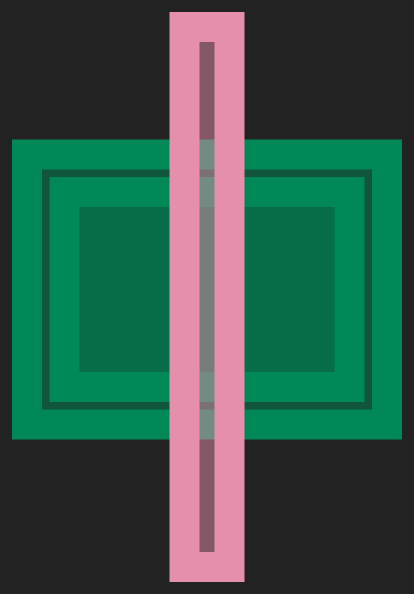

In [14]:
import gdstk
import cairosvg
from IPython.display import Image

library = gdstk.read_gds('mosfet.gds')
top_cells = library.top_level()
top_cells[0].write_svg('mosfet.svg')
cairosvg.svg2png(url='mosfet.svg', write_to='mosfet.png', scale=30.0)
Image('mosfet.png')

Unsupported Ngspice version 36


.title mosfet0
.include /home/mariowei/eda-toolchain/notebooks/mosfet.spice
.lib /home/mariowei/anaconda3/envs/nolimits/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice tt
Xmosfet0 DRAIN GATE VGND mosfet
Vgnd VGND 0 0
Vdd VPWR VGND 1.8
R VPWR DRAIN 10k
VVin GATE VGND DC 0V PULSE(0V 1.8V 1ns 10ps 10ps 1ns 2ns)

done


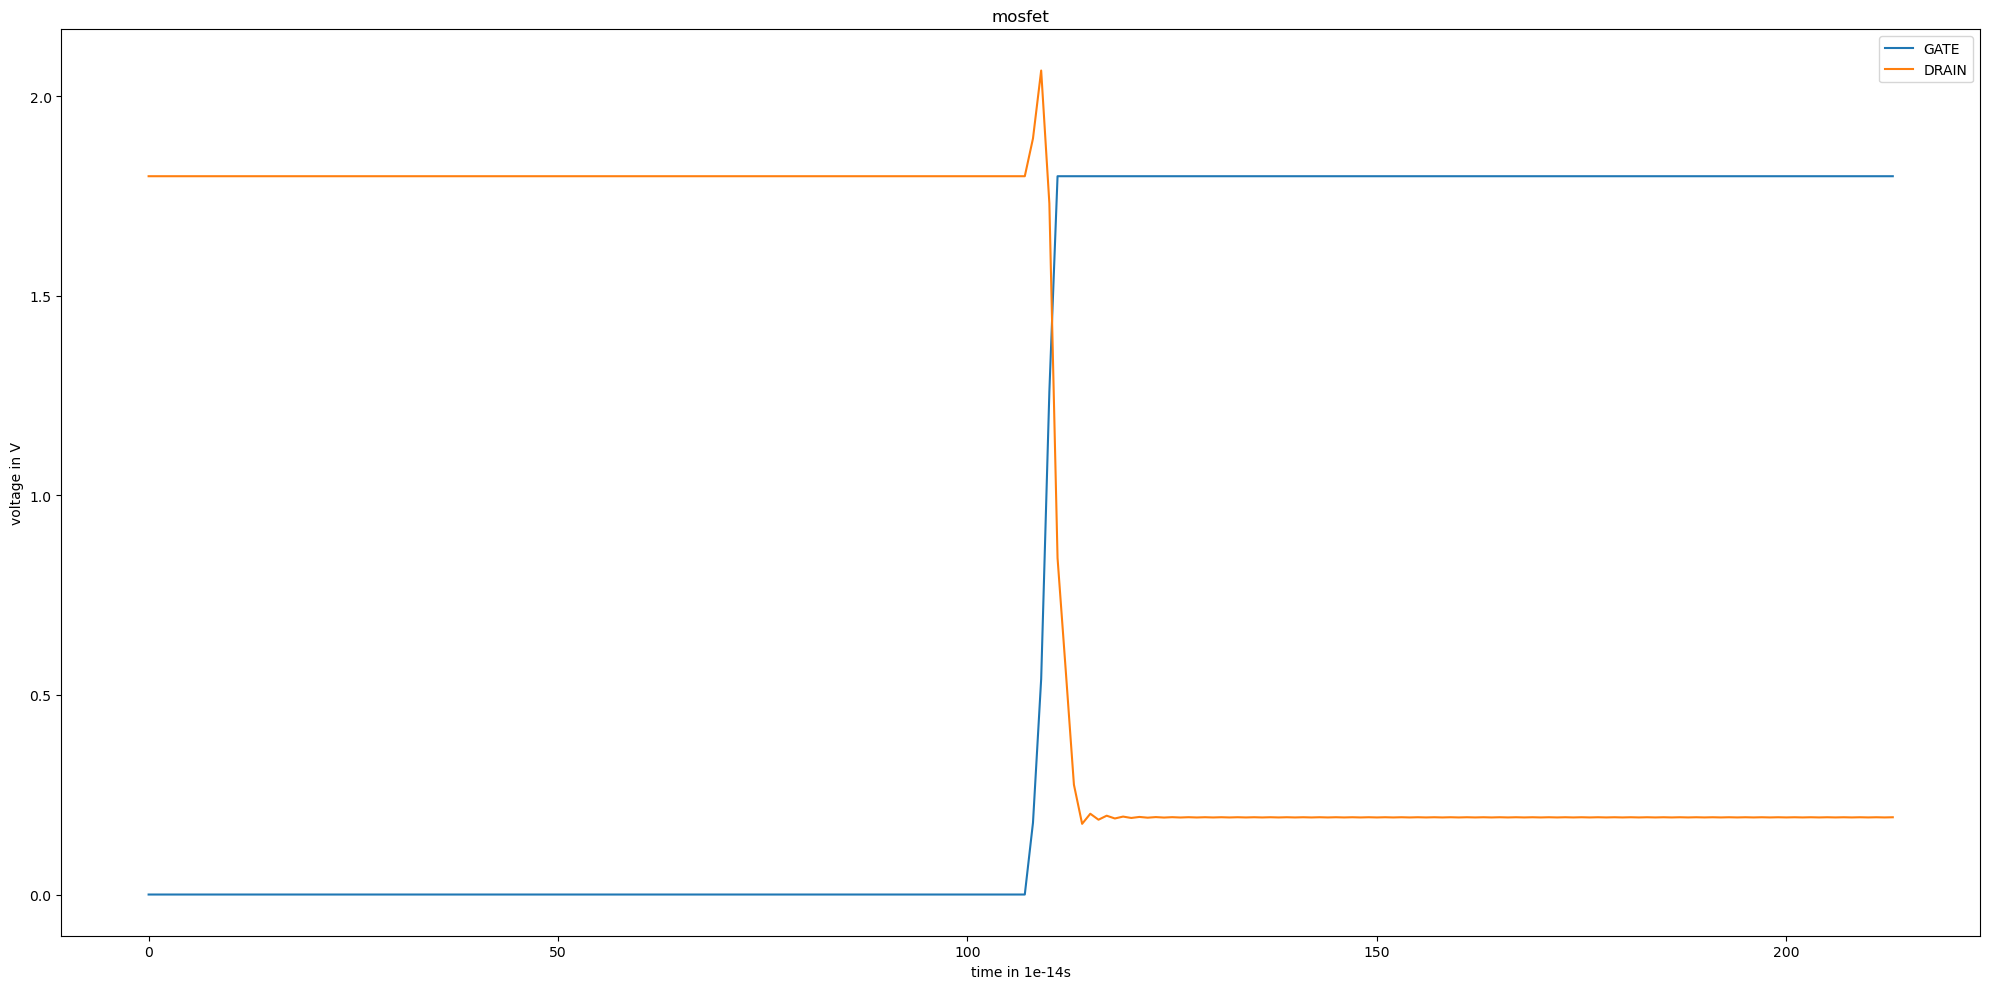

In [16]:
from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Unit import *
import matplotlib.pyplot as plt

circuit = Circuit('mosfet0')
circuit.lib(f'{CONDA_PREFIX}/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice', 'tt')
circuit.include('mosfet.spice')
circuit.X('mosfet0', 'mosfet', 'DRAIN', 'GATE', 'VGND')
circuit.V('gnd', 'VGND', 0, 0)
circuit.V('dd', 'VPWR', 'VGND', 1.8)
circuit.R('', 'VPWR', 'DRAIN', '10k')
circuit.PulseVoltageSource('Vin', 'GATE', 'VGND',
                           initial_value=0@u_V, pulsed_value=1.8@u_V,
                           rise_time=10@u_ps, fall_time=10@u_ps,
                           pulse_width=1@u_ns, period=2@u_ns, delay_time=1@u_ns)
print(str(circuit))
simulator = circuit.simulator()
analysis = simulator.transient(step_time=10@u_ps, end_time=2@u_ns)
print('done')
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('mosfet')
ax.set_xlabel('time in 1e-14s')
ax.set_ylabel('voltage in V')
ax.plot(analysis.GATE)
ax.plot(analysis.DRAIN)
ax.legend(('GATE', 'DRAIN'))
plt.tight_layout()
plt.show()

In [17]:
simulator